In [61]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from sklearn.linear_model import LinearRegression

%matplotlib inline

In [108]:
df = pd.read_csv("/Users/abulbasar/workspace/python/machine-learning/data/istanbul-stock.csv")
df = df.set_index("date")
df.head()

,ISE,SP,DAX,FTSE,NIKKEI,BOVESPA,EU,EM
date,,,,,,,,
5-Jan-09,0.038376,-0.004679,0.002193,0.003894,0.000000,0.031190,0.012698,0.028524
6-Jan-09,0.031813,0.007787,0.008455,0.012866,0.004162,0.018920,0.011341,0.008773
7-Jan-09,-0.026353,-0.030469,-0.017833,-0.028735,0.017293,-0.035899,-0.017073,-0.020015
8-Jan-09,-0.084716,0.003391,-0.011726,-0.000466,-0.040061,0.028283,-0.005561,-0.019424
9-Jan-09,0.009658,-0.021533,-0.019873,-0.012710,-0.004474,-0.009764,-0.010989,-0.007802


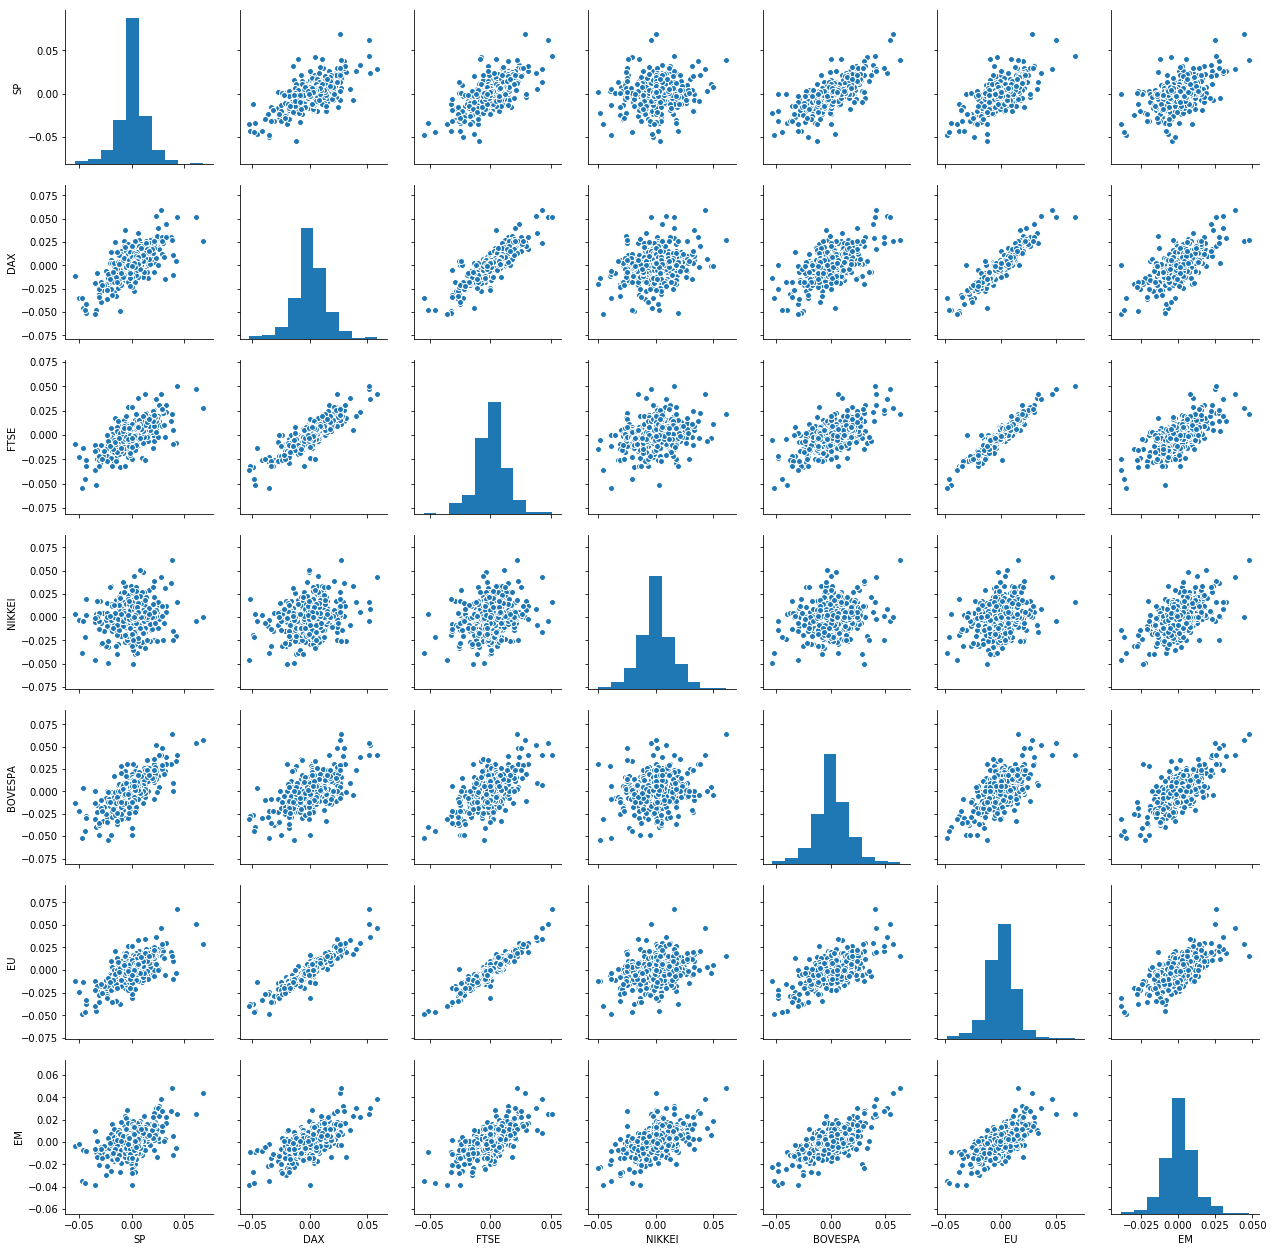

In [109]:
sns.pairplot(df.iloc[:, 1:])

In [111]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 536 entries, 5-Jan-09 to 22-Feb-11
Data columns (total 8 columns):
ISE        536 non-null float64
SP         536 non-null float64
DAX        536 non-null float64
FTSE       536 non-null float64
NIKKEI     536 non-null float64
BOVESPA    536 non-null float64
EU         536 non-null float64
EM         536 non-null float64
dtypes: float64(8)
memory usage: 57.7+ KB


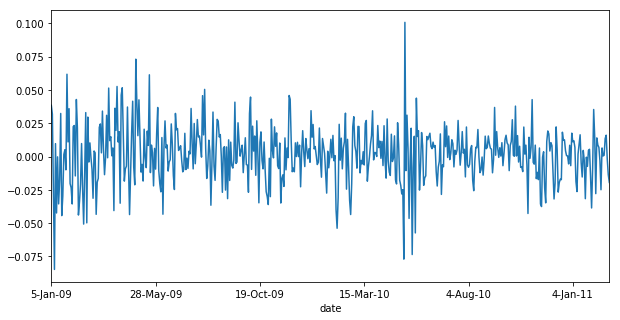

In [112]:
plt.figure(figsize=(10, 5))
df.ISE.plot.line()

In [12]:
df.columns

Index(['date', 'ISE', 'SP', 'DAX', 'FTSE', 'NIKKEI', 'BOVESPA', 'EU', 'EM'], dtype='object')

In [115]:
n_train = 525

In [116]:
training = df.iloc[:n_train, :]
training.tail()

,ISE,SP,DAX,FTSE,NIKKEI,BOVESPA,EU,EM
date,,,,,,,,
1-Feb-11,0.035257,0.016556,0.014976,0.016057,0.003567,0.018926,0.015089,0.006224
2-Feb-11,0.014239,-0.002726,-0.000083,0.007075,0.017641,-0.017230,0.001618,0.003631
3-Feb-11,-0.027850,0.002351,0.001392,-0.002804,-0.002489,0.001154,-0.002883,0.000476
4-Feb-11,0.013959,0.002880,0.003127,0.002354,0.010695,-0.022662,0.002761,-0.003185
7-Feb-11,0.008553,0.006221,0.009298,0.008898,0.004591,0.001424,0.008217,-0.003346


In [140]:
testing = df.iloc[n_train:, :]
testing.head(10)

,ISE,SP,DAX,FTSE,NIKKEI,BOVESPA,EU,EM
date,,,,,,,,
8-Feb-11,0.006886,0.004176,0.005425,0.006638,0.004140,0.006238,0.003980,-0.004499
9-Feb-11,-0.003255,-0.002790,-0.000320,-0.006423,-0.001708,-0.023895,-0.003024,-0.014249
10-Feb-11,-0.024921,0.000749,0.002644,-0.005351,-0.001148,0.005590,-0.003742,-0.014760
11-Feb-11,0.006418,0.005492,0.004204,0.007101,0.011241,0.018077,0.004727,0.003931
14-Feb-11,0.000405,0.002382,0.003444,-0.000462,0.000000,0.012123,0.000169,0.013448
15-Feb-11,0.000893,-0.003240,0.000461,-0.003803,0.001968,-0.003266,-0.000550,-0.001430
16-Feb-11,0.013400,0.006238,0.001925,0.007952,0.005717,0.018371,0.006975,0.003039
17-Feb-11,0.015977,0.003071,-0.001186,0.000345,0.002620,0.001686,-0.000581,0.001039
18-Feb-11,-0.001653,0.001923,0.002872,-0.000723,0.000568,0.005628,0.000572,0.006938


In [118]:
X_train = training.iloc[:, 1:]
y_train = training.iloc[:, 0]

In [119]:
X_train.head()

,SP,DAX,FTSE,NIKKEI,BOVESPA,EU,EM
date,,,,,,,
5-Jan-09,-0.004679,0.002193,0.003894,0.000000,0.031190,0.012698,0.028524
6-Jan-09,0.007787,0.008455,0.012866,0.004162,0.018920,0.011341,0.008773
7-Jan-09,-0.030469,-0.017833,-0.028735,0.017293,-0.035899,-0.017073,-0.020015
8-Jan-09,0.003391,-0.011726,-0.000466,-0.040061,0.028283,-0.005561,-0.019424
9-Jan-09,-0.021533,-0.019873,-0.012710,-0.004474,-0.009764,-0.010989,-0.007802


In [120]:
y_train

date
5-Jan-09     0.038376
6-Jan-09     0.031813
7-Jan-09    -0.026353
8-Jan-09    -0.084716
9-Jan-09     0.009658
12-Jan-09   -0.042361
13-Jan-09   -0.000272
14-Jan-09   -0.035552
15-Jan-09   -0.017268
16-Jan-09    0.032278
19-Jan-09   -0.044349
20-Jan-09   -0.029661
21-Jan-09    0.001529
22-Jan-09    0.005043
23-Jan-09   -0.010008
26-Jan-09    0.061708
27-Jan-09    0.010949
28-Jan-09    0.035871
29-Jan-09   -0.020272
30-Jan-09   -0.023458
2-Feb-09    -0.035607
3-Feb-09     0.022403
4-Feb-09     0.023231
5-Feb-09    -0.014571
6-Feb-09     0.042759
9-Feb-09     0.021468
10-Feb-09   -0.043907
11-Feb-09   -0.033893
12-Feb-09   -0.020825
13-Feb-09    0.009709
               ...   
28-Dec-10    0.000438
29-Dec-10   -0.005582
30-Dec-10    0.008438
31-Dec-10   -0.006861
3-Jan-11     0.017515
4-Jan-11     0.011048
5-Jan-11     0.011780
6-Jan-11     0.006850
7-Jan-11    -0.018755
10-Jan-11   -0.026325
11-Jan-11    0.001795
12-Jan-11    0.009064
13-Jan-11    0.016298
14-Jan-11   -0.004700
17-Ja

In [121]:
X_train = X_train.values

In [123]:
X_test = testing.iloc[:, 1:].values
y_test = testing.iloc[:, 0].values

In [124]:
lr = LinearRegression()
lr.fit(X_train, y_train)
lr.intercept_, lr.coef_

(0.00051892763351971626,
 array([ 0.05259392, -0.20372715, -0.21201692,  0.03463676, -0.24650263,
         1.08078097,  1.01068037]))

In [125]:
lr.score(X_test, y_test)

0.57552023062105151

In [126]:
y_test_pred = lr.predict(X_test)

In [127]:
pd.DataFrame({"true": y_test, "predict": y_test_pred})

,predict,true
0,-0.003414,0.006886
1,-0.010039,-0.003255
2,-0.019226,-0.024921
3,0.003461,0.006418
4,0.010826,0.000405
5,-0.000106,0.000893
6,0.005048,0.013400
7,0.000946,0.015977
8,0.006450,-0.001653
9,-0.006892,-0.013706


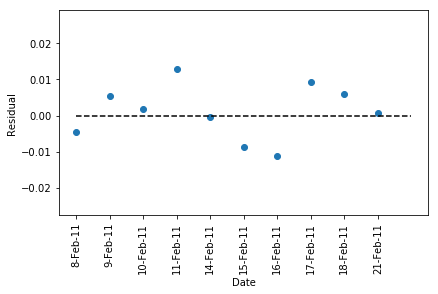

In [158]:
residuals = y_test_pred - y_test
plt.scatter(range(len(residuals)), residuals)
plt.xticks(range(len(residuals)), 
           df.iloc[n_train:, ].index, rotation = 90)
plt.tight_layout()
plt.hlines([0], xmin=0, xmax=10, linestyles = "--")
plt.xlabel("Date")
plt.ylabel("Residual")

In [147]:
residuals

(array([-0.00786557, -0.01958563,  0.00810864,  0.01332954,  0.00043672,
         0.00470649,  0.00476888,  0.00762295, -0.00769335, -0.01871356]),
 array([-0.00325487, -0.0249206 ,  0.00641822,  0.00040451,  0.00089272,
         0.0133999 ,  0.0159772 , -0.0016526 , -0.01370599, -0.01944185]))

In [129]:
def rmse(y_true, y_pred):
    return np.sqrt(np.mean((y_true - y_pred) ** 2))

In [130]:
rmse(y_test, y_test_pred)

0.0080798806938097625

In [131]:
df.columns

Index(['ISE', 'SP', 'DAX', 'FTSE', 'NIKKEI', 'BOVESPA', 'EU', 'EM'], dtype='object')

In [132]:
df.head()

,ISE,SP,DAX,FTSE,NIKKEI,BOVESPA,EU,EM
date,,,,,,,,
5-Jan-09,0.038376,-0.004679,0.002193,0.003894,0.000000,0.031190,0.012698,0.028524
6-Jan-09,0.031813,0.007787,0.008455,0.012866,0.004162,0.018920,0.011341,0.008773
7-Jan-09,-0.026353,-0.030469,-0.017833,-0.028735,0.017293,-0.035899,-0.017073,-0.020015
8-Jan-09,-0.084716,0.003391,-0.011726,-0.000466,-0.040061,0.028283,-0.005561,-0.019424
9-Jan-09,0.009658,-0.021533,-0.019873,-0.012710,-0.004474,-0.009764,-0.010989,-0.007802


In [133]:
df.loc[:,["ISE", "EU"]].shift(1).head()

,ISE,EU
date,,
5-Jan-09,NaN,NaN
6-Jan-09,0.038376,0.012698
7-Jan-09,0.031813,0.011341
8-Jan-09,-0.026353,-0.017073
9-Jan-09,-0.084716,-0.005561


In [134]:
df.shape

(536, 8)

In [135]:
df_lagged = df.shift(1)
df_lagged.shape

(536, 8)

In [136]:
df_lagged.head()

,ISE,SP,DAX,FTSE,NIKKEI,BOVESPA,EU,EM
date,,,,,,,,
5-Jan-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6-Jan-09,0.038376,-0.004679,0.002193,0.003894,0.000000,0.031190,0.012698,0.028524
7-Jan-09,0.031813,0.007787,0.008455,0.012866,0.004162,0.018920,0.011341,0.008773
8-Jan-09,-0.026353,-0.030469,-0.017833,-0.028735,0.017293,-0.035899,-0.017073,-0.020015
9-Jan-09,-0.084716,0.003391,-0.011726,-0.000466,-0.040061,0.028283,-0.005561,-0.019424


In [137]:
df_joined = pd.concat([df, df_lagged], axis=1).iloc[1:, :]

In [138]:
df_joined.head()

,ISE,SP,DAX,FTSE,NIKKEI,BOVESPA,EU,EM,ISE,SP,DAX,FTSE,NIKKEI,BOVESPA,EU,EM
date,,,,,,,,,,,,,,,,
6-Jan-09,0.031813,0.007787,0.008455,0.012866,0.004162,0.018920,0.011341,0.008773,0.038376,-0.004679,0.002193,0.003894,0.000000,0.031190,0.012698,0.028524
7-Jan-09,-0.026353,-0.030469,-0.017833,-0.028735,0.017293,-0.035899,-0.017073,-0.020015,0.031813,0.007787,0.008455,0.012866,0.004162,0.018920,0.011341,0.008773
8-Jan-09,-0.084716,0.003391,-0.011726,-0.000466,-0.040061,0.028283,-0.005561,-0.019424,-0.026353,-0.030469,-0.017833,-0.028735,0.017293,-0.035899,-0.017073,-0.020015
9-Jan-09,0.009658,-0.021533,-0.019873,-0.012710,-0.004474,-0.009764,-0.010989,-0.007802,-0.084716,0.003391,-0.011726,-0.000466,-0.040061,0.028283,-0.005561,-0.019424
12-Jan-09,-0.042361,-0.022823,-0.013526,-0.005026,-0.049039,-0.053849,-0.012451,-0.022630,0.009658,-0.021533,-0.019873,-0.012710,-0.004474,-0.009764,-0.010989,-0.007802


In [143]:
df_joined.shape

(535, 16)

In [142]:
training = df_joined.iloc[:n_train, :]
testing = df_joined.iloc[n_train:, :]
X_train = training.iloc[:, 1:]
y_train = training.iloc[:, 0]
X_test = testing.iloc[:, 1:].values
y_test = testing.iloc[:, 0].values
lr.fit(X_train, y_train)
print("R2", lr.score(X_test, y_test))
y_test_pred = lr.predict(X_test)
rmse(y_test, y_test_pred)

R2 0.662299122169


0.0073740234099932489